# Gradient Descent Exercises

In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

---
## E1.0) Simulate Dataset

In [2]:
def simulate_dataset(samples, features, beta_values):
    np.random.seed(42) # random seed for reproducability

    # generating random X values based on samples and features
    X = np.random.uniform(0, 1, (samples, features))

    # column vector of ones for intercept
    ones = np.ones(len(X))

    # adding column of ones to feature matrix
    X = np.c_[ones, X]

    # generating random noise values
    epsilon = np.random.normal(0, 1, samples)

    # calculating y based on X dot multiplied with beta vector (note beta_0 multiplied by ones from the added column)
    # adding epsilon for some random variance
    y = np.dot(X, beta_values) + epsilon
    y = y.reshape(-1, 1) # giving y the dimensions (1000,1) instead of (1000,)
    
    return X, y

In [3]:
X, y = simulate_dataset(samples = 1000, features = 2, beta_values = [3, 3, 5])

print(f"X:\nShape: {X.shape}\n{X[:3]}\n")
print(f"y:\nShape: {y.shape}\n{y[:3]}")

X:
Shape: (1000, 3)
[[1.         0.37454012 0.95071431]
 [1.         0.73199394 0.59865848]
 [1.         0.15601864 0.15599452]]

y:
Shape: (1000, 1)
[[7.9992093 ]
 [7.36239389]
 [4.02154963]]


---
## E1.1 A) Gradient Descent

In [4]:
def gradient_descent(X, y, learning_rate = 0.1, epochs = 500):
    m = len(X)

    # array of random values with equal amount of rows as X has columns (X.shape[1]), and 1 column
    # for example X (1000, 3) -> theta (3, 1)
    theta = np.random.randn(X.shape[1], 1)

    # looping over epochs
    for _ in range(epochs):

        # calculating gradient
        gradient = 2 / m * X.T @ (X @ theta - y)

        # updating theta based on learning rate and gradient
        theta -= learning_rate * gradient
        
    return theta

In [5]:
# getting theta estimations based on training data
theta = gradient_descent(X, y)

theta

array([[3.12412199],
       [2.95142955],
       [4.82898238]])

---
## E1.1 A) Plotting Theta every 5th Epoch over 500 Epochs

In [6]:
def plot_thetas(title, epochs, step, theta_0, theta_1, theta_2):

    plt.hlines(3, 0, epochs, color = "blue")
    plt.hlines(3, 0, epochs, linestyles = "--", color = "orange")
    plt.hlines(5, 0, epochs, linestyles = "--", color = "green")

    plt.plot(range(1, epochs, step), theta_0, label = "Theta_0", color = "blue")
    plt.plot(range(1, epochs, step), theta_1, label = "Theta_1", color = "orange")
    plt.plot(range(1, epochs, step), theta_2, label = "Theta_2", color = "green")

    plt.legend()

    plt.xlabel("Epochs")
    plt.ylabel("Theta")

    plt.suptitle(title)

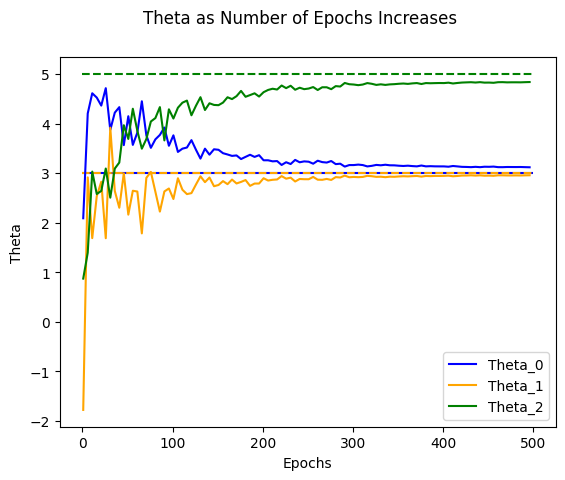

In [7]:
learning_rate = 0.1
epochs = 500
step = 5

theta_0 = []
theta_1 = []
theta_2 = []

for i in range(1, epochs, step):
    theta = gradient_descent(X, y, epochs = i, learning_rate = learning_rate)
    theta_0.append(float(theta[0]))
    theta_1.append(float(theta[1]))
    theta_2.append(float(theta[2]))

plot_thetas("Theta as Number of Epochs Increases", epochs, step, theta_0, theta_1, theta_2)

---
## E1.1 A) Plotting Theta every 20th Epoch over 5000 Epochs

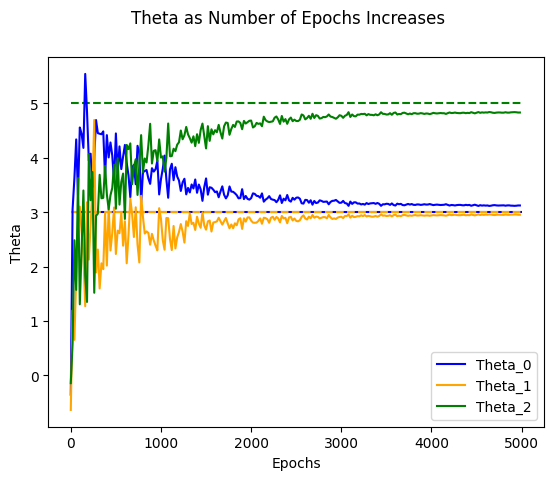

In [8]:
learning_rate = 0.01
epochs = 5000
step = 20

theta_0 = []
theta_1 = []
theta_2 = []

for i in range(1, epochs, step):
    theta = gradient_descent(X, y, epochs = i, learning_rate = learning_rate)
    theta_0.append(float(theta[0]))
    theta_1.append(float(theta[1]))
    theta_2.append(float(theta[2]))

plot_thetas("Theta as Number of Epochs Increases", epochs, step, theta_0, theta_1, theta_2)

---
## E1.2 A) Stochastic Gradient Descent

In [9]:
def stochastic_gradient_descent(X, y, epochs = 10, learning_rate = 0.1):
    np.random.seed(42)

    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(epochs):
        for i in range(m):
            
            # taking random 1-size slices from X and y
            random_index = np.random.randint(m)
            x_i = X[random_index:random_index + 1]
            y_i = y[random_index:random_index + 1]

            gradients = 2 * x_i.T @ (x_i @ (theta) - y_i)

            # decaying learning rate
            # t = epoch * m + i
            # eta = t0 / (t + t1)

            theta -= learning_rate * gradients

    return theta


In [10]:
theta = stochastic_gradient_descent(X, y)

theta

array([[2.80743134],
       [3.07660789],
       [4.71198453]])

---
## E1.2 B) Plotting Theta over Epochs

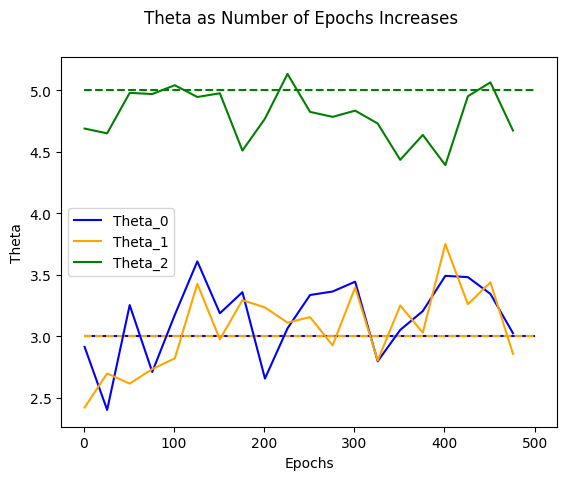

In [11]:
learning_rate = 0.1
epochs = 500
step = 25

theta_0 = []
theta_1 = []
theta_2 = []

for i in range(1, epochs, step):
    theta = stochastic_gradient_descent(X, y, epochs = i, learning_rate = learning_rate)
    theta_0.append(float(theta[0]))
    theta_1.append(float(theta[1]))
    theta_2.append(float(theta[2]))

plot_thetas("Theta as Number of Epochs Increases", epochs, step, theta_0, theta_1, theta_2)

---
## E1.3 A) Mini Batch Gradient Descent

In [12]:
def mini_batch_gradient_descent(X, y, learning_rate = 0.1, epochs = 100, batch_size = 32):
    m = len(X)
    batches = m // batch_size # number of batches per epoch
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(epochs):

        # Shuffle the training data
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(batches):
            start_index = i * batch_size
            end_index = start_index + batch_size

            X_batch = X_shuffled[start_index : end_index]
            y_batch = y_shuffled[start_index : end_index]

            gradient = 2 / m * X_batch.T @ (X_batch @ theta - y_batch)

            theta -= learning_rate * gradient
    
    return theta


In [13]:
theta = mini_batch_gradient_descent(X, y, epochs = 5000)

theta

array([[3.11626098],
       [2.95880382],
       [4.83940973]])

---
## E1.3 B) Plotting Theta over Epochs

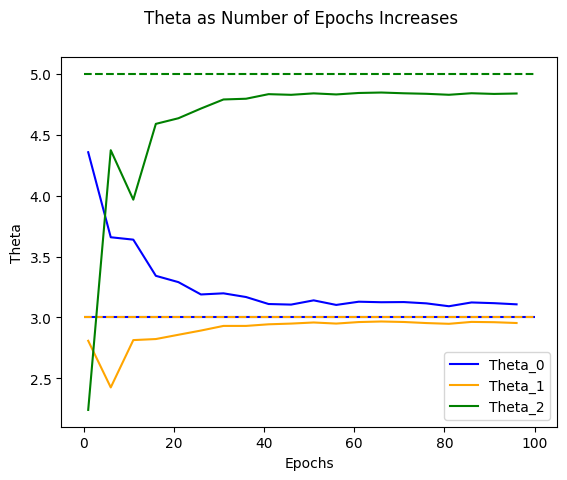

In [14]:
learning_rate = 1
epochs = 100
step = 5

theta_0 = []
theta_1 = []
theta_2 = []

for i in range(1, epochs, step):
    theta = mini_batch_gradient_descent(X, y, epochs = i, learning_rate = learning_rate)
    theta_0.append(float(theta[0]))
    theta_1.append(float(theta[1]))
    theta_2.append(float(theta[2]))

plot_thetas("Theta as Number of Epochs Increases", epochs, step, theta_0, theta_1, theta_2)

---
## E1.4) Comparing Algorithms

In [15]:
def calc_and_plot_thetas(ax, algorithm = "gradient", learning_rate = 0.1, epochs = 50, step = 5):
    theta_0 = []
    theta_1 = []
    theta_2 = []

    for i in range(1, epochs, step):
        if algorithm == "gradient":
            theta = gradient_descent(X, y, epochs = i, learning_rate = learning_rate)
        if algorithm == "stochastic":
            theta = stochastic_gradient_descent(X, y, epochs = i, learning_rate = learning_rate)
        if algorithm == "mini-batch":
            theta = mini_batch_gradient_descent(X, y, epochs = i, learning_rate = learning_rate)
        theta_0.append(float(theta[0]))
        theta_1.append(float(theta[1]))
        theta_2.append(float(theta[2]))

    ax.hlines(3, 0, epochs, color = "blue")
    ax.hlines(3, 0, epochs, linestyles = "--", color = "orange")
    ax.hlines(5, 0, epochs, linestyles = "--", color = "green")

    ax.plot(range(1, epochs, step), theta_0, label = "Theta_0", color = "blue")
    ax.plot(range(1, epochs, step), theta_1, label = "Theta_1", color = "orange")
    ax.plot(range(1, epochs, step), theta_2, label = "Theta_2", color = "green")

    ax.set_title(algorithm.capitalize())

In [16]:
def algorithm_comparison(learning_rate = 0.1, epochs = 100, step = 10):
    algorithms = ["gradient", "stochastic", "mini-batch"]
    fig, axes = plt.subplots(1, 3, figsize = (16, 4))

    for ax, algorithm in zip(axes.flatten(), algorithms):
        calc_and_plot_thetas(ax, algorithm = algorithm, learning_rate = learning_rate, epochs = epochs, step = step)

    axes.flatten()[0].set_ylabel("Theta")
    plt.suptitle("Theta Estimation over Epochs", y = 1.03)
    plt.legend(bbox_to_anchor=(-1.4, 0, 0, 1.23), loc="upper right", ncol = 3);

### Eta: 0.1

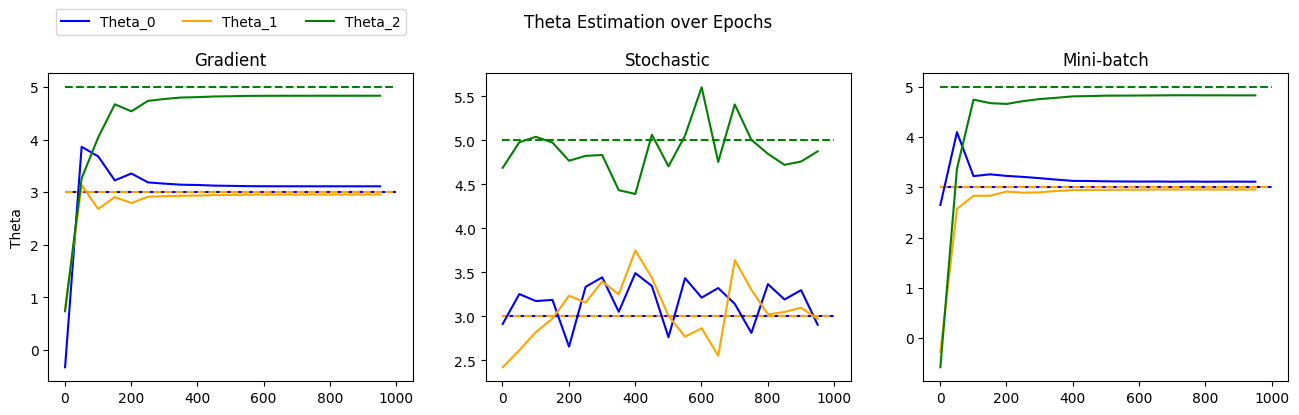

In [17]:
algorithm_comparison(learning_rate = 0.1, epochs = 1000, step = 50)

### Eta: 0.02 (increasing epochs to compensate)

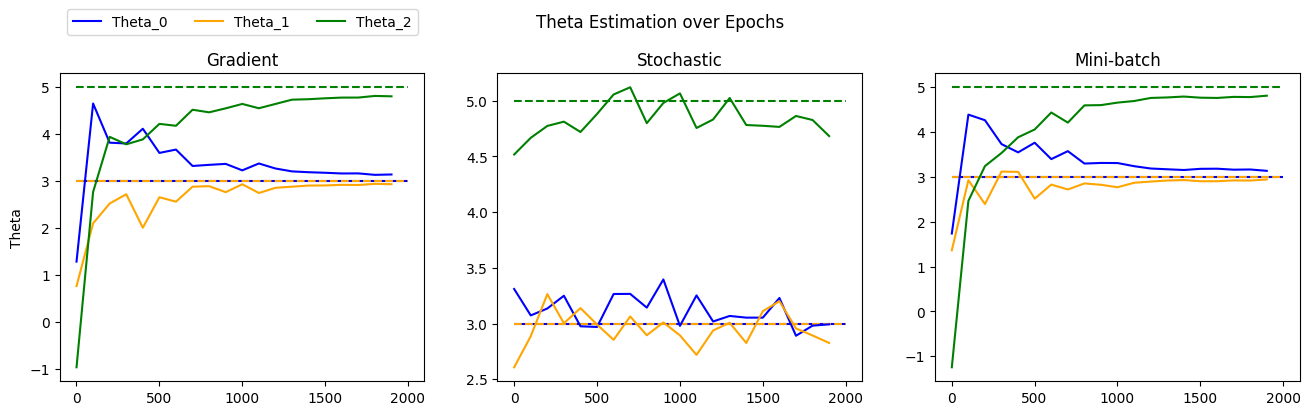

In [18]:
algorithm_comparison(learning_rate = 0.02, epochs = 2000, step = 100)

### Eta: 0.4

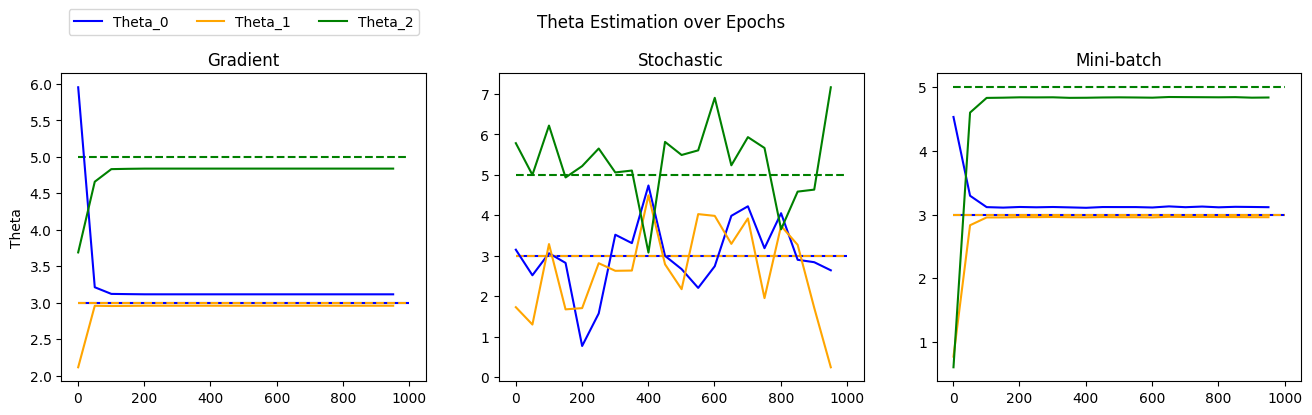

In [19]:
algorithm_comparison(learning_rate = 0.4, epochs = 1000, step = 50)